In [1]:
import tensorflow as tf
import os.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
data_dir = r"C:\Users\Vinnie\Documents\Data2\COVID"

In [34]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [35]:
os.listdir(r"C:\Users\Vinnie\Documents\Data2\COVID")

['images', 'Pneumonia_Images']

In [36]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [37]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [38]:
Data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Vinnie\Documents\Data2\COVID")

Found 4961 files belonging to 2 classes.


In [39]:
Data_iterator = Data.as_numpy_iterator()

In [40]:
batch = Data_iterator.next()

In [41]:
len(batch)

2

In [42]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

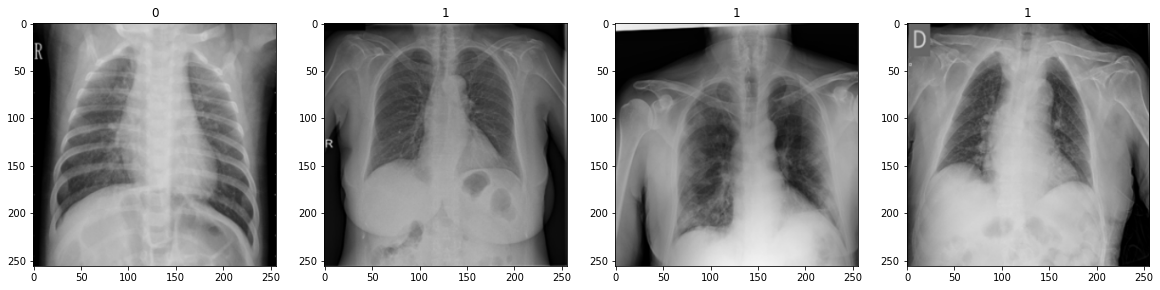

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [45]:
scaled = batch[0] / 255

In [46]:
scaled.max()

1.0

In [47]:
Data = Data.map(lambda x,y: (x/255, y))

In [48]:
scaled_iterator = Data.as_numpy_iterator()

In [49]:
batch = scaled_iterator.next()

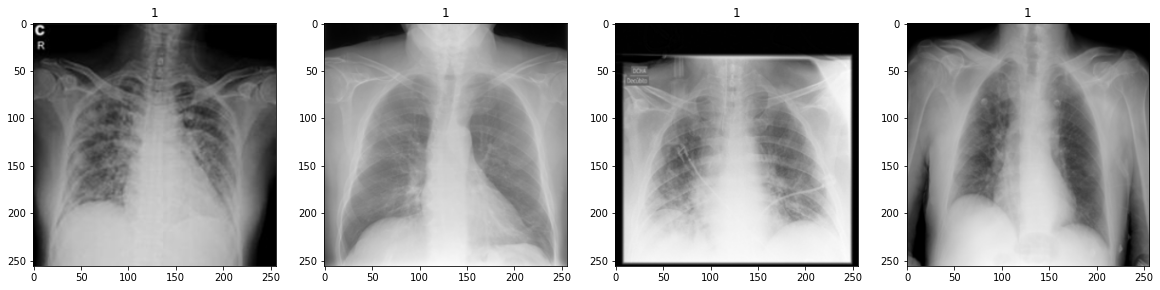

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [51]:
len(Data)

156

In [52]:
train_size = int(len(Data)*.7)
val_size = int(len(Data)*.2)
test_size = int(len(Data)*.1)

In [53]:
train_size

109

In [54]:
val_size

31

In [55]:
test_size

15

In [56]:
train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [61]:
logdir='logs'

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
109/109 [==============================] - 70s 635ms/step - loss: 0.1630 - accuracy: 0.9300 - val_loss: 0.0821 - val_accuracy: 0.9758
Epoch 2/20
109/109 [==============================] - 69s 631ms/step - loss: 0.0780 - accuracy: 0.9710 - val_loss: 0.0661 - val_accuracy: 0.9819
Epoch 3/20
109/109 [==============================] - 68s 617ms/step - loss: 0.0590 - accuracy: 0.9802 - val_loss: 0.0689 - val_accuracy: 0.9778
Epoch 4/20
109/109 [==============================] - 68s 621ms/step - loss: 0.0461 - accuracy: 0.9831 - val_loss: 0.0869 - val_accuracy: 0.9728
Epoch 5/20
109/109 [==============================] - 69s 629ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0775 - val_accuracy: 0.9738
Epoch 6/20
109/109 [==============================] - 69s 625ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 7/20
109/109 [==============================] - 68s 622ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 0.0609 - val_ac

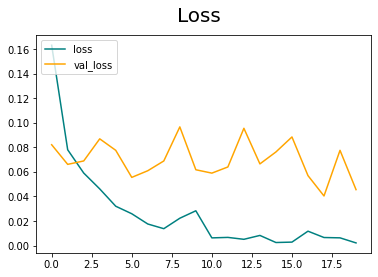

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

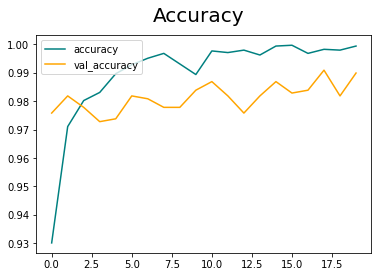

In [65]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 99ms/step


In [69]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.994302, shape=(), dtype=float32) tf.Tensor(0.994302, shape=(), dtype=float32) tf.Tensor(0.9916667, shape=(), dtype=float32)


In [70]:
len(test)

15

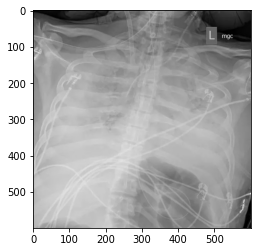

In [71]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\Data2\COVID\Covid_TEST.jpg")
plt.imshow(img)
plt.show()

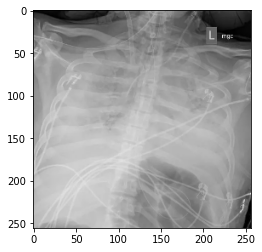

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
Covid_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


In [74]:
if Covid_Test > 0.5: 
    print(f'Predicted class is Covid')
else:
    print(f'Predicted class is Normal')

Predicted class is Covid


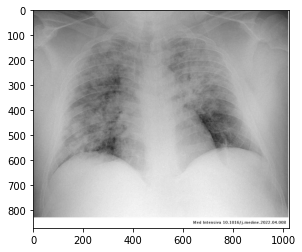

In [75]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\Data2\COVID\Pneumonia_TEST.jpeg")
plt.imshow(img)
plt.show()

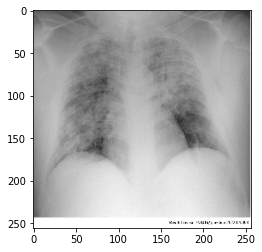

In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
Pneumonia_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [78]:
if Pneumonia_Test > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Pneumonia
